# 4.2 Assignment: Clustering Exercise
# Rahul Rajeev

In [194]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [195]:
# load dataset
als_df = pd.read_csv('als_data.csv')

In [196]:
als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [197]:
als_df.shape

(2223, 101)

### 1. Remove any data that is not relevant to the patient’s ALS condition.
Looking through the columns, the only columns which aren't relevant to the patient's ALS condition are the ID and subject ID. 

In [198]:
als_df = als_df.drop(['ID', 'SubjectID'], axis=1)

### 2. Apply a standard scalar to the data.

In [199]:
# first I have to split the data
ss = StandardScaler()

# scaling data
als_scaled = ss.fit_transform(als_df)

Since this is unlabeled data, I stuck with scaling the entire dataset without splitting into training and test.

### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [200]:
import warnings
warnings.filterwarnings('ignore')

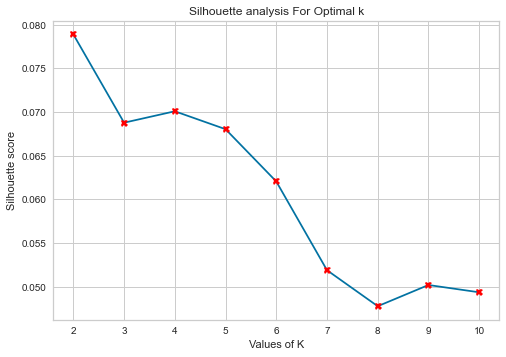

In [201]:
# starting with a list of 2-10 clusters
n_list = np.arange(2,11)
silhouette_avg = []
for n in n_list:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(als_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(als_scaled, cluster_labels))

plt.plot(n_list,silhouette_avg, marker='X', mfc='red')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.xticks(ticks=n_list)
plt.show()

From the plot of average silhouette score vs the number of k clusters, it appears that 2 clusters is the optimal value. However, since the silhouette scores are very close to zero, this raises an alarm as to why KMeans might not be the best model for analysis.

Text(0.5, 1.0, 'Silhouette ')

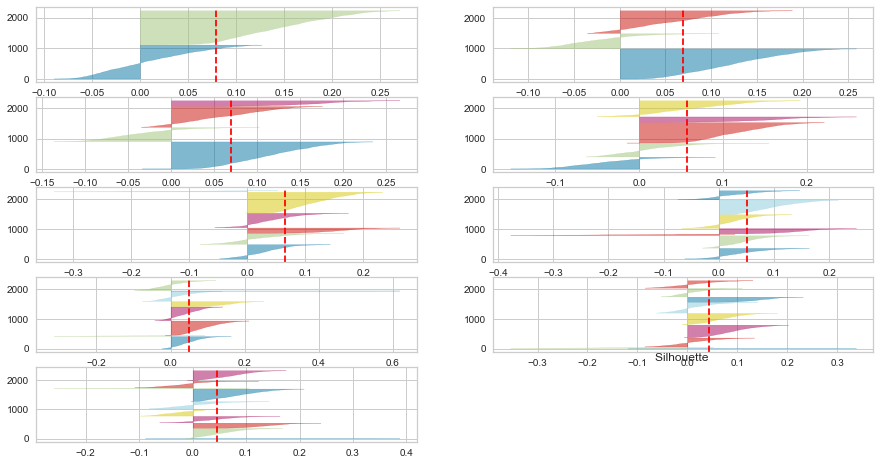

In [202]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(5, 2, figsize=(15,8))
for n in n_list:
    
    # kmeans
    
    km = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    # getting it to the right subplot
    q, mod = divmod(n, 2)
    
    # silhouette visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(als_scaled)
ax[4,1].set_axis_off()
plt.title('Silhouette ')

Even the silhouette visualizers look a lot worse than normal. Parts of the graphs are going in the negative range, which I don't think I've ever seen. Out of the subplots, k=2 appears to still be the best fit since the silhouette scores for two clusters still go over the average and don't have a lot of variability.

### 4. Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.

According to the plot, the optimal number of clusters for k-means is n=2 because it has the highest silhouette score. Although, the silhouette scores are still very close to 0, so there isn't much of a difference compared to the other values for k. 

### 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [203]:
kmeans_optimal = KMeans(n_clusters=2)
kmeans_optimal.fit(als_scaled)

KMeans(n_clusters=2)

I'm not sure if this is what was asked for in this step. Was it only to be fit to this number of clsuters? I suppose that this model is used to get the values of the centers of clusters.

### 6. Fit a PCA transformation with two features to the scaled data.

In [204]:
pca = PCA(2)
als_scaled_pca = pca.fit_transform(als_scaled)

In [205]:
X = pd.DataFrame(als_scaled_pca, columns = ['P1','P2'])
X.head()

,P1,P2
0,-1.426731,-2.319981
1,-1.440234,-4.871886
2,1.617855,-0.429134
3,-1.919992,2.095037
4,0.297699,0.168382


Text(0, 0.5, 'PCA 2')

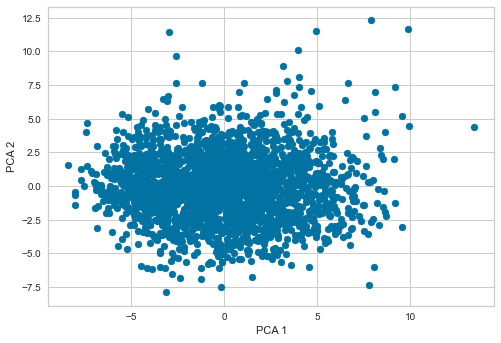

In [206]:
plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### 7. Make a scatterplot of the PCA transformed data coloring each point by its cluster value.

In [207]:
# getting the cluster centers
centers = kmeans_optimal.cluster_centers_

In [208]:
# getting the cluster for each point
y_means = kmeans_optimal.fit_predict(X)

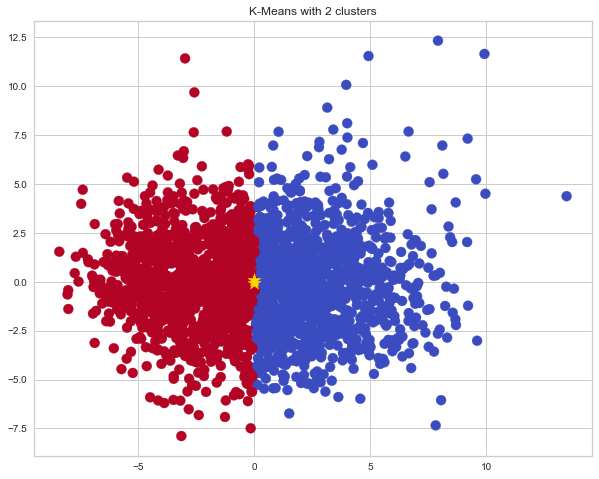

In [209]:
plt.figure(figsize=(10, 8))
plt.title('K-Means with 2 clusters')
# plotting the p1 and p2 along with the colors assigned by the cluster from each point
plt.scatter(X.P1, X.P2, c=y_means, s=100, cmap = 'coolwarm')
plt.scatter(centers[:,0], centers[:,1], color='gold', marker='*', s=200) 
plt.show()

### 8. Summarize your results and make a conclusion.

From the very start, it seemed like Kmeans wasn't the best clustering method for the data. For example, the silhouette score was very close to zero and the visualizer had weird shapes. Having average silhouette scores of less than 1 implies that there is no structure to be found in the data. Additionally, after performing PCA with two features and creating the plot with the two clusters, they appear to be overlapping with their centers on top of each other almost. 

To conclude, it may be worthwhile to try other unsupervised clustering methods to get a better feel and better prediction for the data. 